In [3]:
import torch

class PointDataset(torch.utils.data.Dataset):
    def __init__(self, filename):
        self.data = []
        
        with open(filename, 'r') as f:
            for line in f:
                x, y = line.split(" ")
                x, y = float(x), float(y)
                self.data.append((x, y))
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]


ds = PointDataset("../dataset1.txt")

In [4]:
class LineModule(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand(1))
    
    def forward(self, x):
        return self.w * x
    

model = LineModule()
print(list(model.parameters()))
print(model(torch.tensor([2.0])))

[Parameter containing:
tensor([0.7305], requires_grad=True)]
tensor([1.4610], grad_fn=<MulBackward0>)


In [4]:
from tqdm import trange

ds = PointDataset("dataset1.txt")
model = LineModule()
dl = torch.utils.data.DataLoader(ds, batch_size=8)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for epoch in trange(1000):
    for batch in dl:
        x, y = batch
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset1.txt'

In [ ]:
print(model.w)

Parameter containing:
tensor([2.3977], requires_grad=True)


In [ ]:
data = torch.stack([torch.tensor(i) for i in ds.data])

ww = torch.arange(-10, 10, step=.1)

errors = []
for w in ww:
    preds = w*data[:, 0]
    error = loss_fn(preds, data[:, 1])
    errors.append(error)


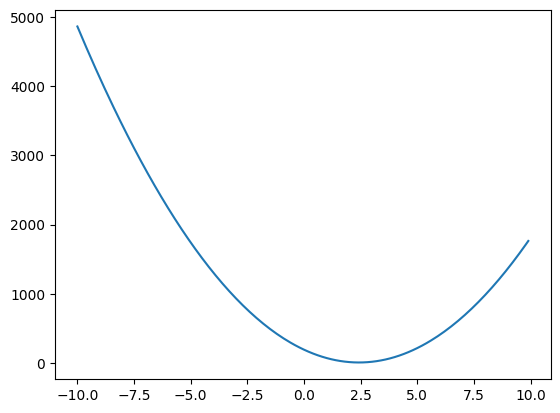

In [ ]:
from matplotlib import pyplot as plt


plt.plot(ww, errors)

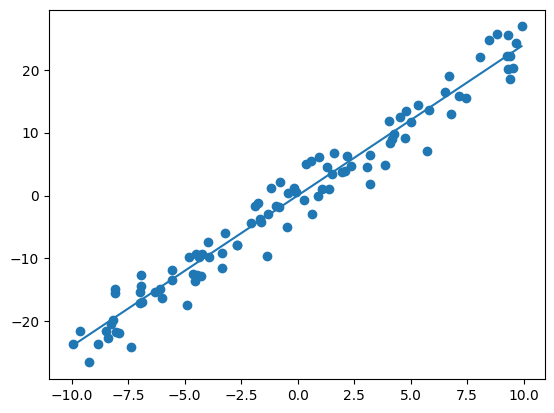

In [ ]:
from matplotlib import pyplot as plt

xx = torch.arange(-10, 10, step=0.1)
plt.scatter(data[:, 0], data[:, 1])

plt.plot(xx, model(xx).detach().numpy())